# Analyzing whether or not a loan borrower will default in his payments

#### The objective of the Python code is to predict the likelihood of a borrower defaulting on a loan. For this, we will perform Data Analysis and use a machine learning model to train and test the dataset to check the accuracy of the model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv('loan.csv', low_memory = False)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
data.info(verbose= True,show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [8]:
loan_data = data
print(data.isna().sum())
x = 0.5*(data.count()[0])
data.dropna(axis= 1, inplace= True, thresh= x)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


C:\Users\tanya\AppData\Local\Temp\ipykernel_16900\2782959031.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = 0.5*(data.count()[0])


In [9]:
x = data.select_dtypes(include=['object']).columns
x
for i in data[x]: 
    print(i, data[i].unique())

term [' 36 months' ' 60 months']
int_rate ['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' '15.28%' '15.65%

In [10]:
data.drop(columns = ['id', 'member_id','url','zip_code','addr_state','emp_title','pymnt_plan','title','initial_list_status',
                    'application_type', 'desc'], inplace= True)

In [11]:
## Data Cleaning: converting text to numbers
data['term'] = data['term'].apply(lambda x: x.split()[0])

data['int_rate'] = data['int_rate'].apply(lambda x: x.split('%')[0])

data['revol_util'].fillna(data['revol_util'].mode()[0], inplace = True)
data['revol_util'] = data['revol_util'].apply(lambda x: x.split('%')[0])


data['emp_length'].fillna(data['emp_length'].mode()[0], inplace = True)
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(int)
data['emp_length'].unique()


array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [12]:
data['term']=data['term'].astype(int)
data['int_rate'] = data['int_rate'].astype(float)
data['revol_util'] = data['revol_util'].astype(float)


In [13]:
# Converting text to date columns
data['issue_d'] = pd.to_datetime(data['issue_d'], format= '%b-%y').dt.year
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format= '%b-%y').dt.year
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format= '%b-%y').dt.year
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format= '%b-%y').dt.year


In [14]:
data.select_dtypes(include=['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose'],
      dtype='object')

#### Given the columns that have null values are string, mostly categorical, we will replace the null values with Mode here.
##### This is a conscious decision so that the distribution of the dataset is maintained. (Mode represents the most frequent value)

In [16]:
# Fill missing values with the most frequent value
m1 = data['last_pymnt_d'].mode()[0]
m2 = data['last_credit_pull_d'].mode()[0]
m3 = data['collections_12_mths_ex_med'].mode()[0]
m4 = data['chargeoff_within_12_mths'].mode()[0]
m5 = data['pub_rec_bankruptcies'].mode()[0]
m6 = data['tax_liens'].mode()[0]

data['last_pymnt_d'].fillna(m1, inplace=True)
data['last_credit_pull_d'].fillna(m2, inplace=True)
data['collections_12_mths_ex_med'].fillna(m3, inplace=True)
data['chargeoff_within_12_mths'].fillna(m4, inplace=True)
data['pub_rec_bankruptcies'].fillna(m5, inplace=True)
data['tax_liens'].fillna(m6, inplace=True)

In [17]:
print(data.isna().sum())

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

#### Feature Engineering

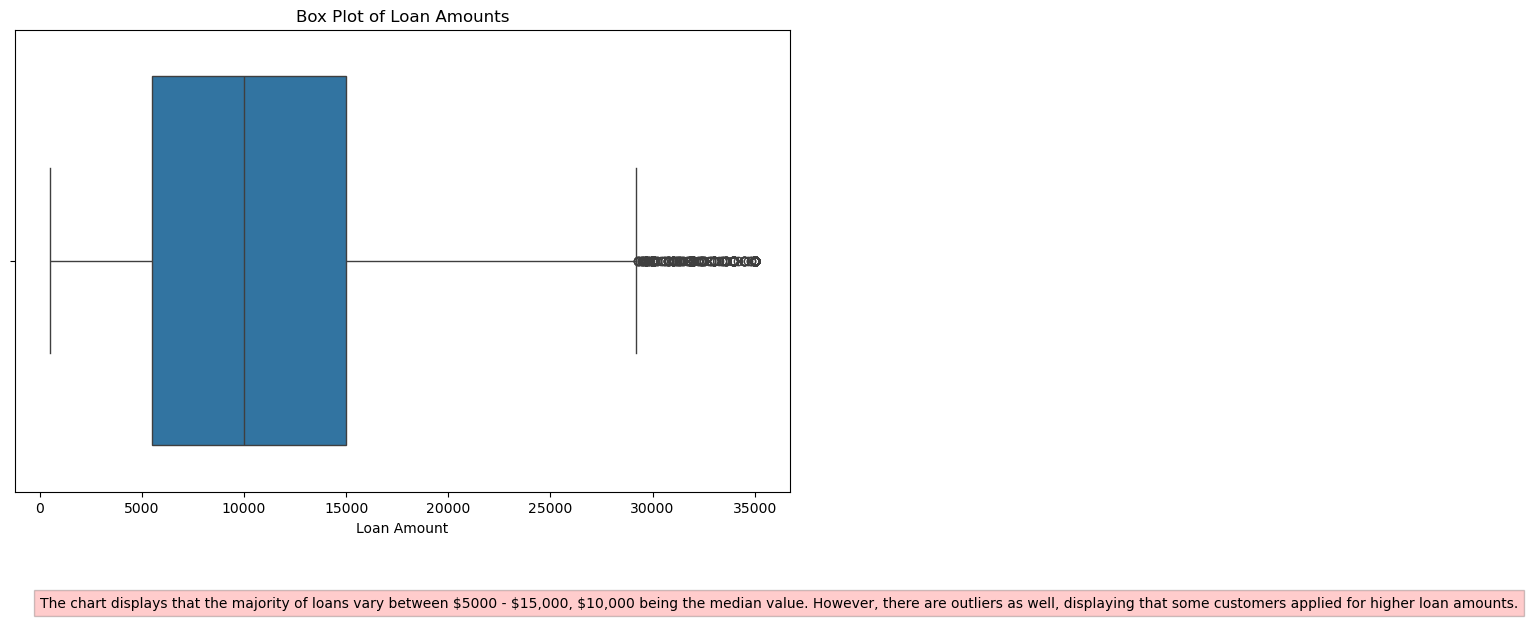

In [19]:
## Visualizing the data before modelling

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_amnt', data= data )
plt.title('Box Plot of Loan Amounts')
plt.xlabel('Loan Amount')
plt.text(0,0.75,'The chart displays that the majority of loans vary between $5000 - $15,000, $10,000 being the median value. However, there are outliers as well, displaying that some customers applied for higher loan amounts.',
        bbox=dict(facecolor='red', alpha=0.2))
plt.show()

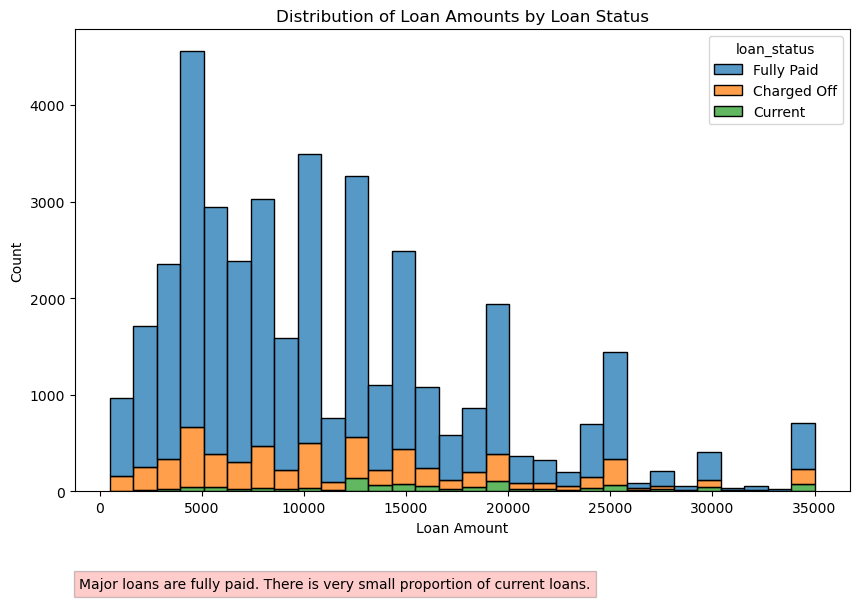

In [20]:
# Distribution of Loan Amounts by Loan Status
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='loan_amnt', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.text(-1000,-1000,'Major loans are fully paid. There is very small proportion of current loans.', bbox=dict(facecolor='red', alpha=0.2))
plt.show()


# Interest rate by loan status
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='loan_status', y='int_rate', hue= 'loan_status')
plt.title('Interest Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.text(-1,-1,'One interesting point to note in this graph is that the median and the third quartile for Current loans are higher than charged off loans.', 
         bbox=dict(facecolor='yellow', alpha=0.2))
plt.show()

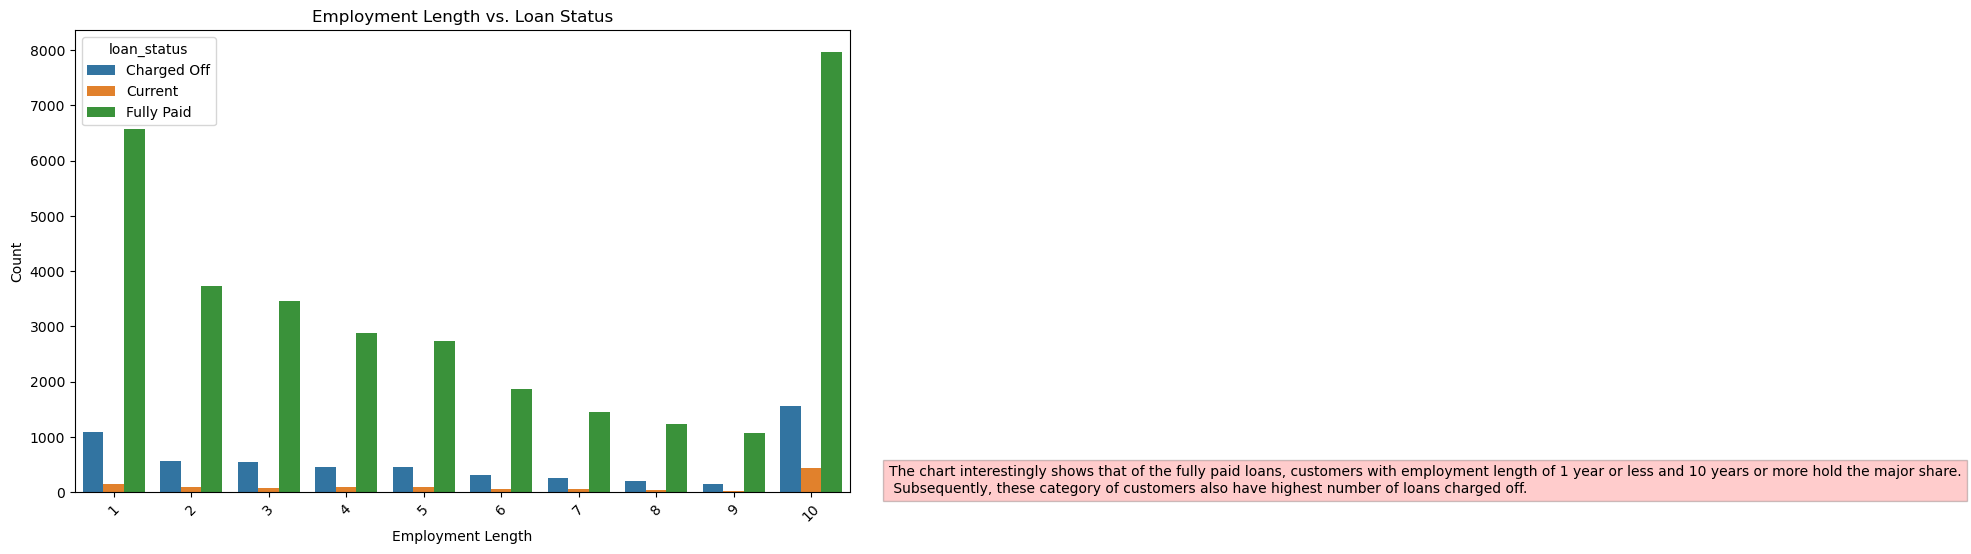

In [22]:
#Employment Length vs. Loan Status
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='emp_length', hue='loan_status')
plt.title('Employment Length vs. Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.text(10, -5.5,'The chart interestingly shows that of the fully paid loans, customers with employment length of 1 year or less and 10 years or more hold the major share.\n Subsequently, these category of customers also have highest number of loans charged off.', 
          fontsize=10, bbox=dict(facecolor='red', alpha=0.2))
plt.show()



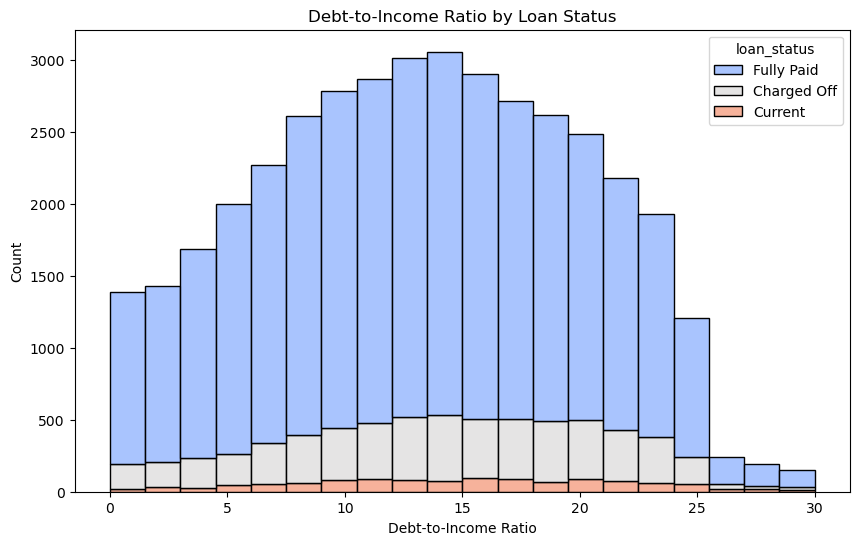

In [23]:
# Debt-to-Income Ratio by Loan Status

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='dti', hue='loan_status', multiple='stack' , bins=20, palette= 'coolwarm')
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Count')
plt.show()


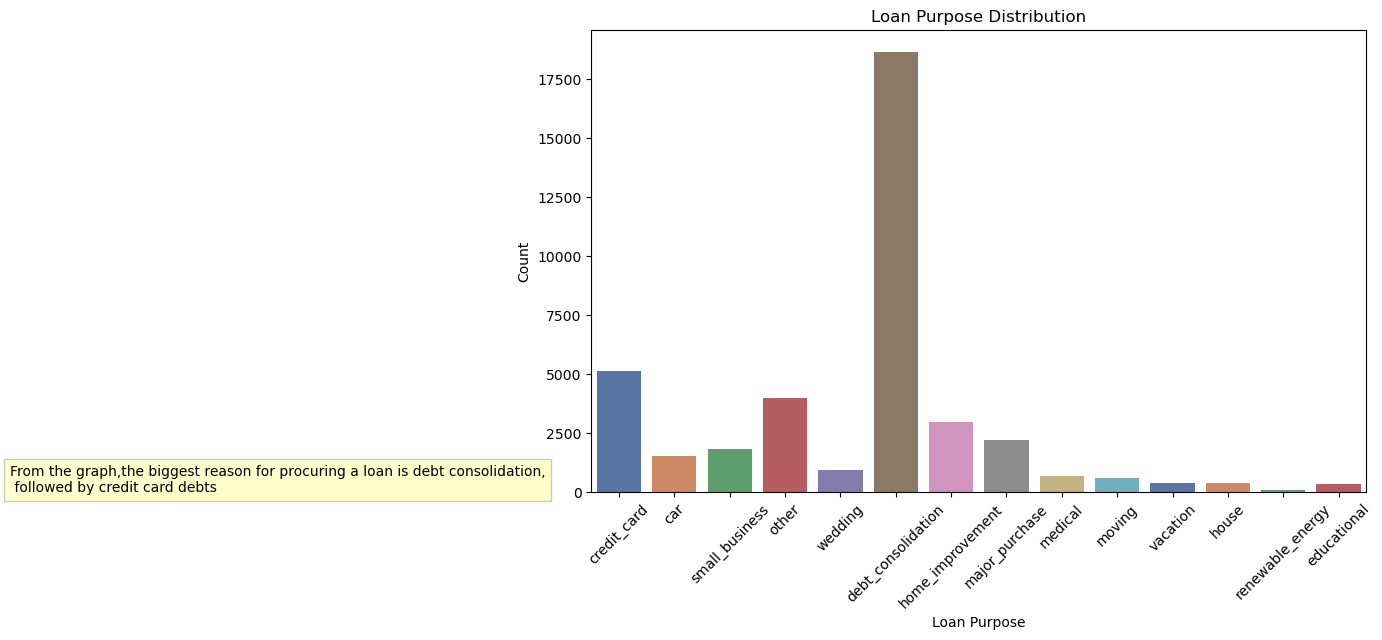

In [24]:
# Loan purpose distribution
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='purpose', hue = 'purpose', palette = 'deep')
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.text(-11,-0.1,'From the graph,the biggest reason for procuring a loan is debt consolidation,\n followed by credit card debts',  bbox=dict(facecolor='yellow', alpha=0.2))
plt.show()


In [25]:
# encoding categorical data to later use in the model
data = pd.get_dummies(data, columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose'])
print(data)

       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
4           3000         3000           3000.0    60     12.69        67.79   
...          ...          ...              ...   ...       ...          ...   
39712       2500         2500           1075.0    36      8.07        78.42   
39713       8500         8500            875.0    36     10.28       275.38   
39714       5000         5000           1325.0    36      8.07       156.84   
39715       5000         5000            650.0    36      7.43       155.38   
39716       7500         7500            800.0    36     13.75       255.43   

       emp_length  annual_inc  issue_d  loan_status

### Model Building, Training & Evaluation

In [27]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

<Axes: >

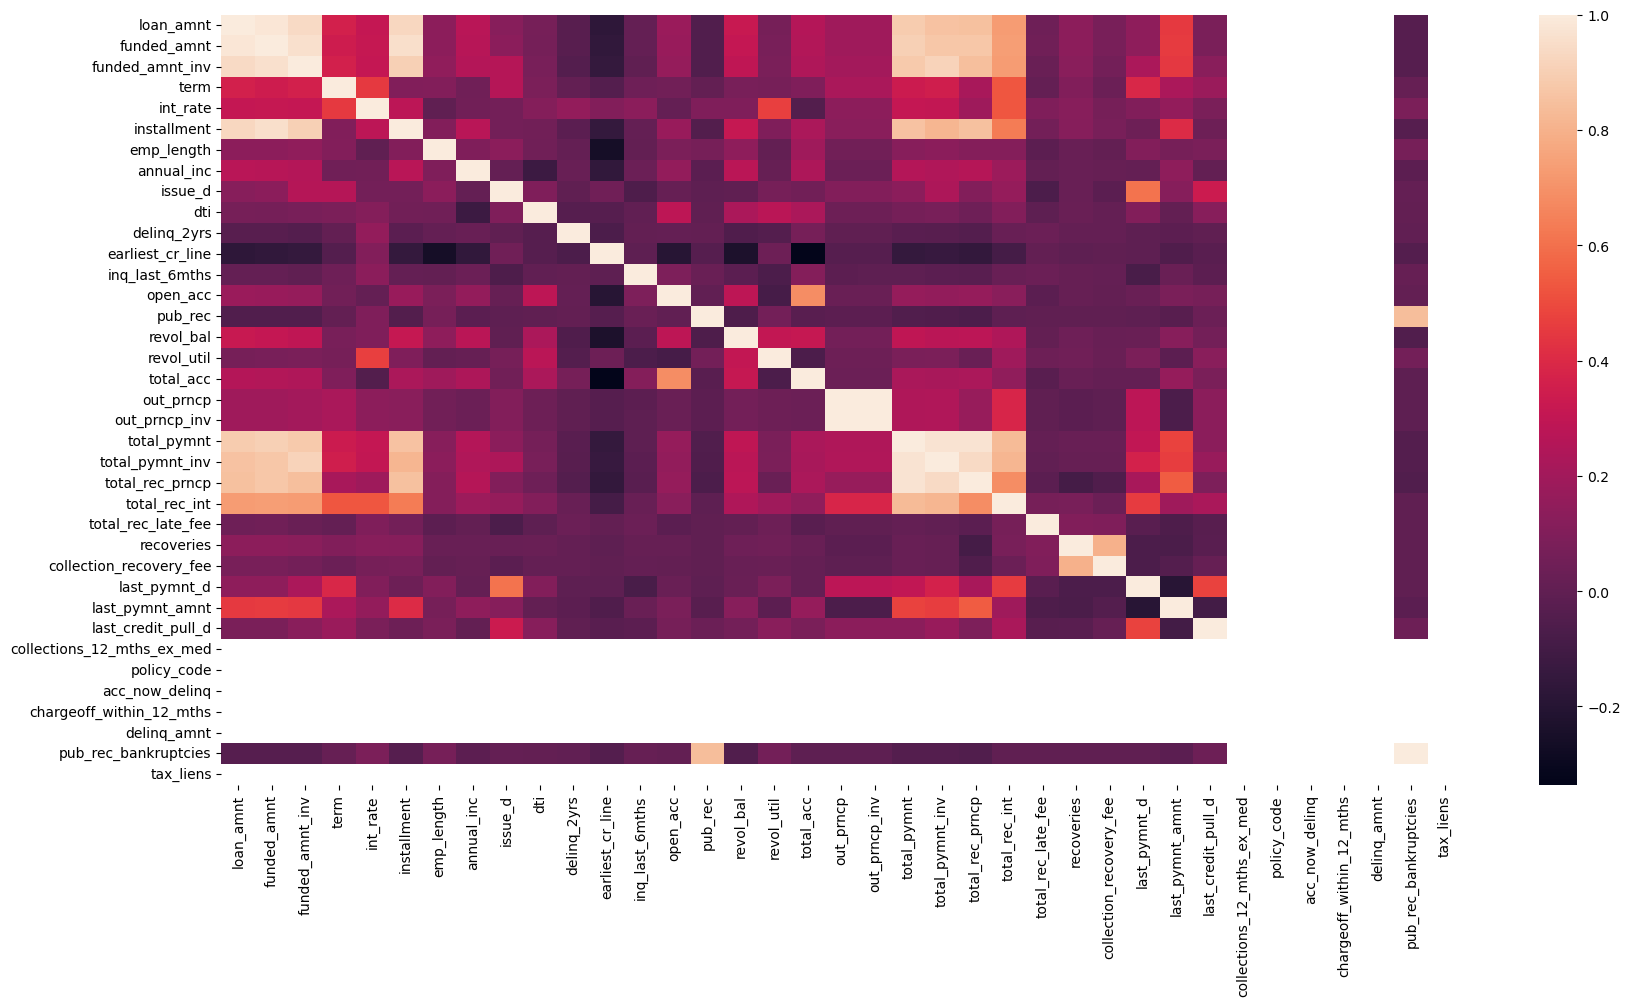

In [28]:
data_corr = data.select_dtypes(include=np.number).corr()
data_corr
plt.figure(figsize=(20,10))
sns.heatmap(data_corr)

In [29]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=48)


In [32]:
# Train the Logistic Regression Model
lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


C:\Users\tanya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
lr_pred

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

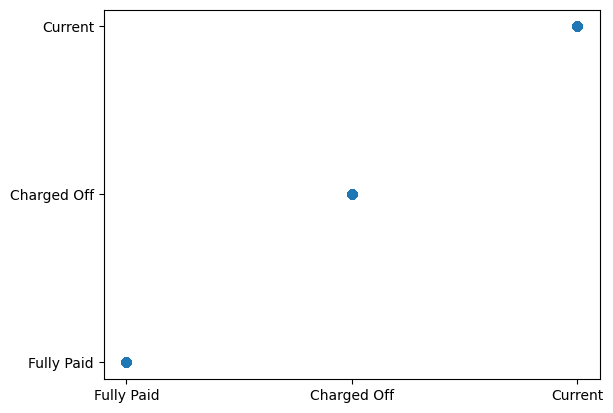

In [34]:
plt.scatter(y_test, lr_pred)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Precision, Recall, F1-Score
precision = precision_score(y_test, lr_pred, average='weighted')  # Weighted for imbalanced data
recall = recall_score(y_test, lr_pred, average='weighted')  # Weighted for imbalanced data
f1 = f1_score(y_test, lr_pred, average='weighted')  # Weighted for imbalanced data

# Classification Report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00      1263
     Current       1.00      1.00      1.00       271
  Fully Paid       1.00      1.00      1.00      7601

    accuracy                           1.00      9135
   macro avg       1.00      1.00      1.00      9135
weighted avg       1.00      1.00      1.00      9135



In [36]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
model = LogisticRegression(max_iter=3000)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

C:\Users\tanya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tanya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation scores: [1.         0.99987412 0.99974821 1.         0.99899282]
Mean accuracy: 0.999723029733883
Standard deviation: 0.000376852071355015


C:\Users\tanya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#The model is giving perfect accuracy. Even the cross validation gave a SD of 0.0003.
# To make sure that the model is not overfitting, we can do feature importance.

#Using Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold 


le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=48)

# We are addressing collinearity using VarianceThreshold (to remove features with low variance)
selector = VarianceThreshold(threshold=0.001)  
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can tune alpha for best results
lasso.fit(X_train_scaled, y_train)

feature_names = X.columns
feature_importance = np.abs(lasso.coef_)


Index(['funded_amnt', 'term', 'int_rate', 'total_rec_prncp', 'recoveries',
       'last_pymnt_amnt'],
      dtype='object')


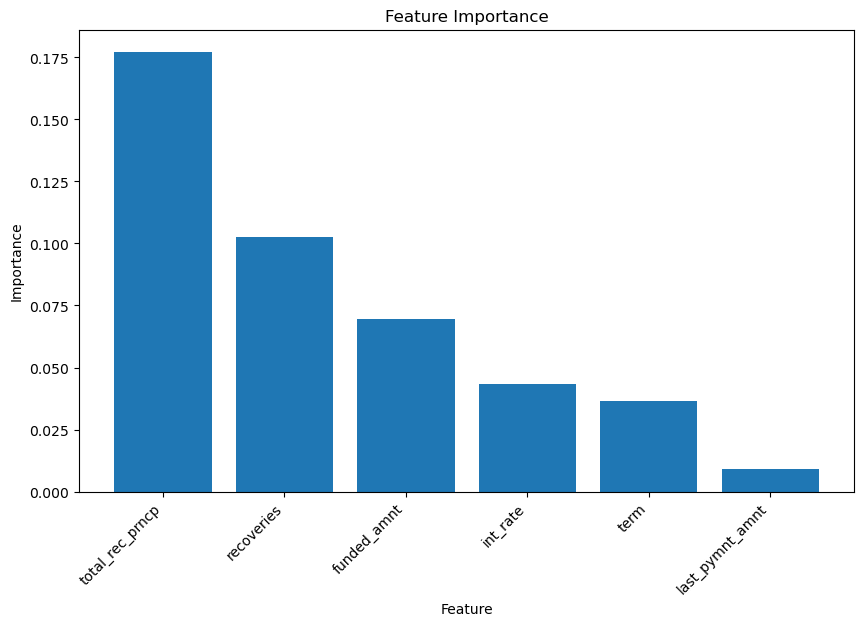

In [38]:
# Get indices of non-zero coefficients part identifies the indices of non-zero coefficients.These indices are used to extract the corresponding feature names.
non_zero_coef_indices = np.where(lasso.coef_ != 0)[0]

# Extract feature names corresponding to non-zero coefficients
selected_features = feature_names[non_zero_coef_indices]
print(selected_features)

# A new DataFrame is created using only the selected features and their associated importance scores.

feature_importance_df = pd.DataFrame({'feature': selected_features, 'importance': feature_importance[non_zero_coef_indices]})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [73]:
X = data[['total_rec_prncp','recoveries','funded_amnt','int_rate','term','last_pymnt_amnt']]
y = data['loan_status']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 103)


In [77]:
# Train the Logistic Regression Model
lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [79]:
lr_pred

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Current',
       'Fully Paid', 'Fully Paid'], dtype=object)

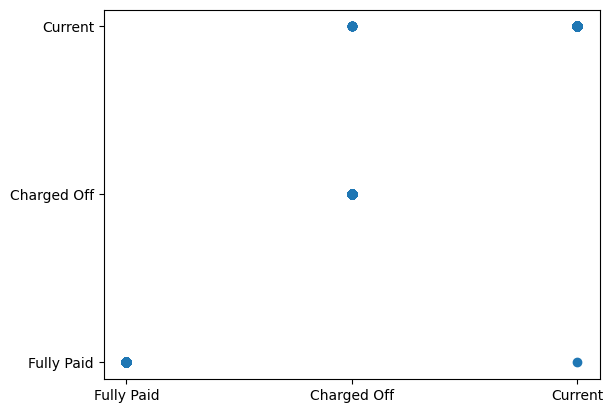

In [81]:
plt.scatter(y_test, lr_pred)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Precision, Recall, F1-Score
precision = precision_score(y_test, lr_pred, average='weighted')  # Weighted for imbalanced data
recall = recall_score(y_test, lr_pred, average='weighted')  # Weighted for imbalanced data
f1 = f1_score(y_test, lr_pred, average='weighted')  # Weighted for imbalanced data

# Classification Report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

 Charged Off       1.00      0.99      1.00      1191
     Current       0.96      1.00      0.98       216
  Fully Paid       1.00      1.00      1.00      6537

    accuracy                           1.00      7944
   macro avg       0.99      1.00      0.99      7944
weighted avg       1.00      1.00      1.00      7944



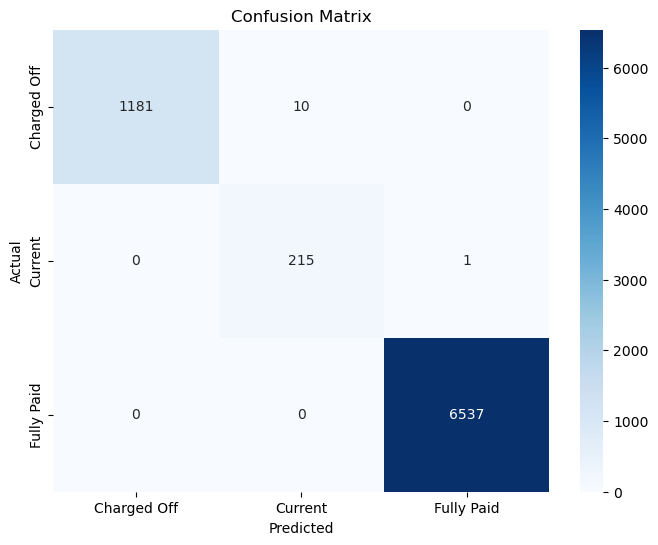

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Charged Off', 'Current', 'Fully Paid'], yticklabels=['Charged Off', 'Current', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()